In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

from scipy import stats
pd.set_option('display.max_rows', 500)

In [2]:
df = pickle.load( open( "seattle_data.pkl", "rb" ) )

In [3]:
df.shape

(47424, 11)

In [4]:
df.head()

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
0,2015-07-02 00:53:00,2015-07-02,74.0,0.0,48.0,CLR,29.94,10.0,Calm,0.0,1282.0
1,2015-07-02 01:53:00,2015-07-02,72.0,0.0,53.0,CLR,29.94,10.0,Variable,3.0,1277.0
2,2015-07-02 02:53:00,2015-07-02,70.0,0.0,55.0,CLR,29.95,10.0,North,3.0,1226.0
3,2015-07-02 03:53:00,2015-07-02,68.0,0.0,59.0,CLR,29.96,10.0,Calm,0.0,1186.0
4,2015-07-02 04:53:00,2015-07-02,68.0,0.0,61.0,CLR,29.97,10.0,West,3.0,1157.0


## Detecting Outliers: Initial Viz

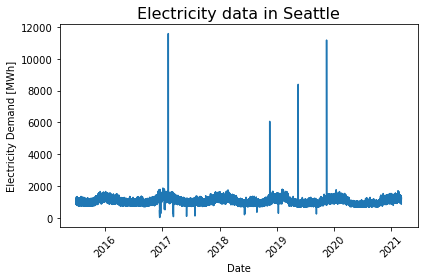

In [19]:
fig,ax = plt.subplots()
ax.plot(df['DATE'], df['DEMAND'])
ax.set_title('Electricity data in Seattle', fontsize=16)
ax.set_ylabel('Electricity Demand [MWh]')
ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.tight_layout()

**Can identify outliers in the target based on the above plot and the following**

***Histogram to visually identify outliers***

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


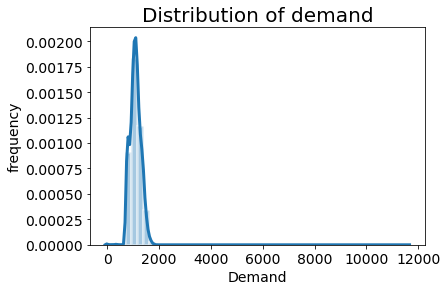

In [6]:
# histogram and kernel density estimation function of the variable Demand
ax = sns.distplot(df.DEMAND, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
"""ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))"""

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Demand', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of demand', fontsize=20);

Possible outliers above 2000 MWh and below 700?

***BoxPlot to statistically identify outliers***

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Demand')

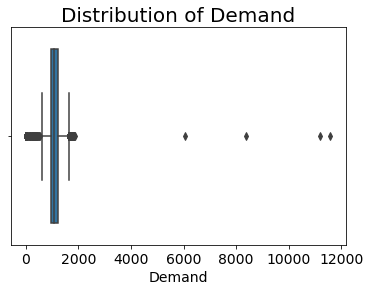

In [7]:
# box plot of the variable demand
ax = sns.boxplot(df.DEMAND)

# notation indicating an outlier
"""ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
"""
# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Demand', fontsize=14)
plt.title('Distribution of Demand', fontsize=20)

***Scatter plot to further visually identify the outliers***

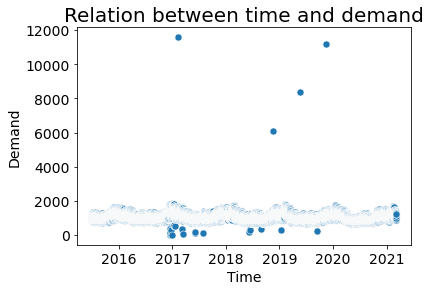

In [8]:

# scatter plot
ax = sns.scatterplot(x='DATE', y='DEMAND', data=df, s=50)

"""
# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
"""
# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.title('Relation between time and demand', fontsize=20);

***Using scipy z-score calculation to identify outliers in Demand***

In [9]:
df[(np.abs(stats.zscore(df.DEMAND)) > 3)]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
12071,2016-12-13 23:53:00,2016-12-13,33.0,0.0,78.0,CLR,30.25,10.0,North,6.0,422.0
12072,2016-12-14 00:53:00,2016-12-14,32.0,0.0,82.0,CLR,30.25,10.0,North,6.0,379.0
12074,2016-12-14 02:53:00,2016-12-14,33.0,0.0,78.0,CLR,30.23,10.0,North,6.0,403.0
12075,2016-12-14 03:53:00,2016-12-14,33.0,0.0,75.0,CLR,30.20,10.0,North,5.0,338.0
12076,2016-12-14 04:53:00,2016-12-14,33.0,0.0,72.0,CLR,30.18,10.0,North,7.0,337.0
...,...,...,...,...,...,...,...,...,...,...,...
29897,2019-02-05 17:53:00,2019-02-05,32.0,0.0,59.0,BKN,29.98,10.0,Calm,0.0,1778.0
29921,2019-02-06 17:53:00,2019-02-06,34.0,0.0,59.0,FEW,30.30,10.0,Calm,0.0,1767.0
32323,2019-05-17 19:53:00,2019-05-17,58.0,0.0,53.0,BKN,29.92,10.0,Variable,7.0,8389.0
35015,2019-09-10 23:53:00,2019-09-10,60.0,0.0,84.0,CLR,30.02,10.0,Calm,0.0,241.0


In [10]:
df.DEMAND.describe()

count    47424.000000
mean      1093.712677
std        222.147210
min          0.000000
25%        952.000000
50%       1087.000000
75%       1228.000000
max      11583.000000
Name: DEMAND, dtype: float64

Any demand at 0?...

In [11]:
df.DEMAND.isna().sum()

0

**Handling demand==0 using spline imputation?**

In [12]:
df[df.DEMAND == 0]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
12097,2016-12-15 01:53:00,2016-12-15,34.0,0.0,73.0,OVC,29.85,10.0,Calm,0.0,0.0
12098,2016-12-15 02:53:00,2016-12-15,35.0,0.0,72.0,OVC,29.86,10.0,Calm,0.0,0.0
12099,2016-12-15 03:53:00,2016-12-15,35.0,0.0,72.0,OVC,29.86,10.0,Calm,0.0,0.0
12100,2016-12-15 04:53:00,2016-12-15,35.0,0.0,70.0,OVC,29.85,10.0,Calm,0.0,0.0
12101,2016-12-15 05:53:00,2016-12-15,35.0,0.0,70.0,BKN,29.85,10.0,Calm,0.0,0.0
12103,2016-12-15 07:53:00,2016-12-15,35.0,0.0,70.0,BKN,29.88,10.0,Calm,0.0,0.0
12104,2016-12-15 08:53:00,2016-12-15,35.0,0.0,72.0,FEW,29.89,10.0,East,3.0,0.0
12105,2016-12-15 09:53:00,2016-12-15,36.0,0.0,67.0,SCT,29.91,10.0,Variable,3.0,0.0
12106,2016-12-15 10:53:00,2016-12-15,37.0,0.0,65.0,OVC,29.91,10.0,North,7.0,0.0
12107,2016-12-15 11:53:00,2016-12-15,38.0,0.0,65.0,BKN,29.91,10.0,Variable,5.0,0.0


In [13]:
df.DEMAND.replace(0.00, np.NaN, inplace=True)

In [14]:
df.DEMAND.interpolate(method='spline', order=2, inplace=True)

In [15]:
df.loc[df.SHORTDATE == '2016-12-16']

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
12120,2016-12-16 00:53:00,2016-12-16,34.0,0.0,67.0,FEW,29.90,10.0,North,7.0,1298.268191
12121,2016-12-16 01:53:00,2016-12-16,32.0,0.0,69.0,BKN,29.91,10.0,North,5.0,1307.745102
12122,2016-12-16 02:53:00,2016-12-16,32.0,0.0,66.0,CLR,29.94,10.0,Variable,3.0,1312.456017
12123,2016-12-16 03:53:00,2016-12-16,31.0,0.0,69.0,BKN,29.94,10.0,Variable,3.0,1312.400934
12124,2016-12-16 04:53:00,2016-12-16,32.0,0.0,59.0,SCT,29.95,10.0,North,7.0,1307.579856
12125,2016-12-16 05:53:00,2016-12-16,31.0,0.0,67.0,CLR,29.96,10.0,North,3.0,1297.992780
12126,2016-12-16 06:53:00,2016-12-16,30.0,0.0,69.0,FEW,29.98,10.0,Calm,0.0,1283.639708
12127,2016-12-16 07:53:00,2016-12-16,30.0,0.0,66.0,FEW,30.00,10.0,Variable,6.0,1264.520640
12128,2016-12-16 08:53:00,2016-12-16,31.0,0.0,69.0,SCT,30.04,10.0,North,6.0,1240.635575
12129,2016-12-16 09:53:00,2016-12-16,33.0,0.0,61.0,SCT,30.07,10.0,North,7.0,1212.000000


***Interpolation problem solved: successfully handled 0 Demand days using spline interpolation***

### Handling the remaining outliers

In [24]:
df.DEMAND.describe()

count    47424.000000
mean      1094.346836
std        220.600899
min         19.187668
25%        953.000000
50%       1087.000000
75%       1229.000000
max      11583.000000
Name: DEMAND, dtype: float64

In [17]:
with open('seattle_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

In [39]:
len(df[(np.abs(stats.zscore(df.DEMAND)) > 3)])

81

**Investigate demand less than 500MWh**

In [23]:
df[df.DEMAND < 500]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
12071,2016-12-13 23:53:00,2016-12-13,33.0,0.00,78.0,CLR,30.25,10.0,North,6.0,422.000000
12072,2016-12-14 00:53:00,2016-12-14,32.0,0.00,82.0,CLR,30.25,10.0,North,6.0,379.000000
12073,2016-12-14 01:53:00,2016-12-14,34.0,0.00,75.0,CLR,30.23,10.0,North,8.0,445.000000
12074,2016-12-14 02:53:00,2016-12-14,33.0,0.00,78.0,CLR,30.23,10.0,North,6.0,403.000000
12075,2016-12-14 03:53:00,2016-12-14,33.0,0.00,75.0,CLR,30.20,10.0,North,5.0,338.000000
12076,2016-12-14 04:53:00,2016-12-14,33.0,0.00,72.0,CLR,30.18,10.0,North,7.0,337.000000
12077,2016-12-14 05:53:00,2016-12-14,33.0,0.00,70.0,CLR,30.16,10.0,North,6.0,349.000000
12078,2016-12-14 06:53:00,2016-12-14,33.0,0.00,64.0,CLR,30.15,10.0,North,7.0,339.000000
12079,2016-12-14 07:53:00,2016-12-14,32.0,0.00,66.0,OVC,30.12,10.0,North,6.0,353.000000
12080,2016-12-14 08:53:00,2016-12-14,32.0,0.00,66.0,BKN,30.11,10.0,North,7.0,322.000000


In [33]:
df.loc[df.SHORTDATE.str.contains('12-14')]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
3792,2015-12-14 00:53:00,2015-12-14,45.0,0.00,83.0,BKN,29.88,10.0,East,5.0,1356.0
3793,2015-12-14 01:53:00,2015-12-14,43.0,0.00,86.0,BKN,29.91,10.0,South,6.0,1417.0
3794,2015-12-14 02:51:00,2015-12-14,45.0,0.00,76.0,SCT,29.94,10.0,East,5.0,1465.0
3795,2015-12-14 03:53:00,2015-12-14,42.0,0.00,85.0,SCT,29.95,10.0,East,5.0,1451.0
3796,2015-12-14 04:53:00,2015-12-14,44.0,0.00,76.0,FEW,29.97,10.0,East,3.0,1436.0
3797,2015-12-14 05:51:00,2015-12-14,45.0,0.00,76.0,OVC,30.00,10.0,East,3.0,1401.0
3798,2015-12-14 06:14:00,2015-12-14,45.0,0.00,76.0,SCT,30.01,10.0,East,6.0,1332.0
3799,2015-12-14 07:53:00,2015-12-14,45.0,0.00,71.0,BKN,30.04,10.0,Calm,0.0,1202.0
3800,2015-12-14 08:53:00,2015-12-14,44.0,0.00,76.0,BKN,30.08,10.0,Calm,0.0,1107.0
3801,2015-12-14 09:53:00,2015-12-14,46.0,0.00,71.0,BKN,30.11,10.0,Calm,0.0,1048.0


In [34]:
df.DEMAND.loc[df.SHORTDATE.str.contains('12-14')].describe()

count     120.000000
mean     1081.125000
std       400.553033
min       231.000000
25%       986.000000
50%      1230.000000
75%      1391.750000
max      1528.000000
Name: DEMAND, dtype: float64

It appears a lot of the "outliers" may be garbage or incorrectly reported values, as seen after comparing values on 12-14-2016 and 12-14 of other years. 

**Investigate Demand greater than 2000**

In [28]:
df[df.DEMAND > 2000]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
13315,2017-02-07 19:53:00,2017-02-07,37.0,0.0,73.0,BKN,29.88,10.0,Calm,0.0,11583.0
28057,2018-11-17 01:53:00,2018-11-17,47.0,0.0,77.0,CLR,30.27,10.0,Variable,3.0,6063.0
32323,2019-05-17 19:53:00,2019-05-17,58.0,0.0,53.0,BKN,29.92,10.0,Variable,7.0,8389.0
36476,2019-11-14 20:53:00,2019-11-14,52.0,0.0,75.0,CLR,29.93,10.0,South,6.0,11174.0


Only a few with demand greater than 2000. Strangely high numbers. Can assume they are errors?

In [43]:
df[df.SHORTDATE == '2019-11-14']

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
36456,2019-11-14 00:53:00,2019-11-14,48.0,0.0,89.0,BKN,30.00,5.00,Calm,0.0,1118.0
36457,2019-11-14 01:53:00,2019-11-14,47.0,0.0,90.0,BKN,29.99,6.00,Calm,0.0,1174.0
36458,2019-11-14 02:46:00,2019-11-14,46.0,0.0,93.0,BKN,30.00,1.50,Calm,0.0,1260.0
36459,2019-11-14 03:19:00,2019-11-14,43.0,0.0,97.0,OVC,29.99,0.50,Calm,0.0,1254.0
36460,2019-11-14 04:53:00,2019-11-14,46.0,0.0,96.0,VV,29.98,0.50,Calm,0.0,1228.0
36461,2019-11-14 05:53:00,2019-11-14,46.0,0.0,96.0,VV,29.99,0.75,Calm,0.0,1188.0
36462,2019-11-14 06:36:00,2019-11-14,47.0,0.0,93.0,OVC,29.99,2.50,Calm,0.0,1123.0
36463,2019-11-14 07:44:00,2019-11-14,47.0,0.0,93.0,OVC,30.00,0.75,Calm,0.0,1032.0
36464,2019-11-14 08:21:00,2019-11-14,47.0,0.0,97.0,OVC,30.00,1.50,Calm,0.0,946.0
36465,2019-11-14 09:14:00,2019-11-14,48.0,0.0,93.0,OVC,30.00,3.00,South,3.0,873.0


In [56]:
df.DEMAND[(np.abs(stats.zscore(df.DEMAND)) > 3.5)] = np.NaN

<ipython-input-56-616833f1e2d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DEMAND[(np.abs(stats.zscore(df.DEMAND)) > 3.5)] = np.NaN


In [57]:
df.isna().sum()

DATE              0
SHORTDATE         0
Temperature       0
Precipitation     0
Humidity          0
Condition         0
Pressure          0
Visibility        0
WindDirection     0
WindSpeed         0
DEMAND           32
dtype: int64

In [58]:
df.DEMAND.interpolate(method='spline', order=2, inplace=True)

In [47]:
df.DEMAND.loc[df.SHORTDATE.str.contains('06-04')]

7656     1225.0
7657     1211.0
7658     1172.0
7659     1124.0
7660     1101.0
7661     1091.0
7662     1053.0
7663      974.0
7664      903.0
7665      847.0
7666      829.0
7667      815.0
7668      808.0
7669      810.0
7670      848.0
7671      928.0
7672     1027.0
7673     1082.0
7674     1131.0
7675     1149.0
7676     1145.0
7677     1131.0
7678     1123.0
7679     1121.0
16008    1001.0
16009    1019.0
16010    1006.0
16011    1007.0
16012     997.0
16013    1010.0
16014     943.0
16015     870.0
16016     816.0
16017     753.0
16018     759.0
16019     733.0
16020      93.0
16021     114.0
16022     199.0
16023     841.0
16024     908.0
16025     960.0
16026     990.0
16027    1030.0
16028    1036.0
16029    1019.0
16030    1018.0
16031    1013.0
24312     996.0
24313    1016.0
24314    1028.0
24315    1014.0
24316    1001.0
24317    1002.0
24318     939.0
24319     857.0
24320     786.0
24321     757.0
24322     751.0
24323     738.0
24324     771.0
24325     851.0
24326   

In [71]:
df.DEMAND[(np.abs(stats.zscore(df.DEMAND)) > 3.5)] = np.NaN

<ipython-input-71-616833f1e2d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DEMAND[(np.abs(stats.zscore(df.DEMAND)) > 3.5)] = np.NaN


In [79]:
df.DEMAND.iloc[12071] = np.NaN

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [82]:
df.DEMAND.loc[df.SHORTDATE == '2016-12-14'] = np.NaN

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [86]:
df.DEMAND.iloc[12096:12110] = np.NaN

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [87]:
df.DEMAND.interpolate(method='spline', order=2, inplace=True)

In [99]:
df.iloc[12059:12210]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
12059,2016-12-13 11:53:00,2016-12-13,39.0,0.00,76.0,OVC,30.27,10.0,Variable,3.0,1125.000000
12060,2016-12-13 12:53:00,2016-12-13,39.0,0.00,76.0,OVC,30.27,10.0,North,11.0,1129.000000
12061,2016-12-13 13:53:00,2016-12-13,39.0,0.00,76.0,BKN,30.26,10.0,North,6.0,1185.000000
12062,2016-12-13 14:53:00,2016-12-13,39.0,0.00,73.0,BKN,30.26,10.0,North,6.0,1324.000000
12063,2016-12-13 15:53:00,2016-12-13,39.0,0.00,73.0,OVC,30.26,10.0,North,6.0,1522.000000
12064,2016-12-13 16:53:00,2016-12-13,38.0,0.00,76.0,OVC,30.27,10.0,Variable,5.0,1645.000000
12065,2016-12-13 17:53:00,2016-12-13,37.0,0.00,76.0,BKN,30.27,10.0,North,6.0,1638.000000
12066,2016-12-13 18:53:00,2016-12-13,37.0,0.00,73.0,BKN,30.26,10.0,North,5.0,1595.000000
12067,2016-12-13 19:00:00,2016-12-13,36.0,0.00,79.0,SCT,30.26,10.0,North,6.0,1583.000000
12068,2016-12-13 20:53:00,2016-12-13,35.0,0.00,78.0,FEW,30.25,10.0,North,5.0,1565.000000


In [102]:
with open('seattle_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

## Did electricity demand change significantly during the pandemic? Investigate after interpolating outliers above

In [100]:
df.DEMAND.loc[df.SHORTDATE > '2020-03-15'].describe()

count    8112.000000
mean     1030.589497
std       199.103479
min       662.000000
25%       903.000000
50%      1003.000000
75%      1161.000000
max      1701.000000
Name: DEMAND, dtype: float64

In [101]:
df.DEMAND.loc[df.SHORTDATE < '2020-03-15'].describe()

count    39288.000000
mean      1107.423435
std        203.670792
min        386.370519
25%        971.000000
50%       1102.000000
75%       1238.000000
max       2038.404159
Name: DEMAND, dtype: float64

May have decreased slightly during the pandemic. Let's visualize it.

### Revisiting outlier detection after initial interpolation.

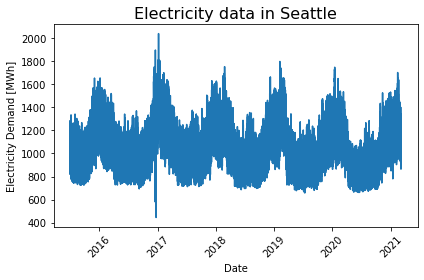

In [114]:
fig,ax = plt.subplots()
ax.plot(df['DATE'], df['DEMAND'])
ax.set_title('Electricity data in Seattle', fontsize=16)
ax.set_ylabel('Electricity Demand [MWh]')
ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.tight_layout()

**Can identify outliers in the target based on the above plot and the following**

***Histogram to visually identify outliers***

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


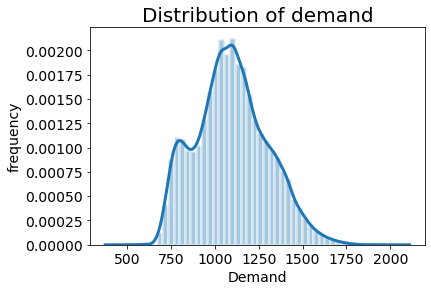

In [115]:
# histogram and kernel density estimation function of the variable Demand
ax = sns.distplot(df.DEMAND, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
"""ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))"""

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Demand', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of demand', fontsize=20);

Possible outliers above 2000 MWh and below 700?

***BoxPlot to statistically identify outliers***

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Demand')

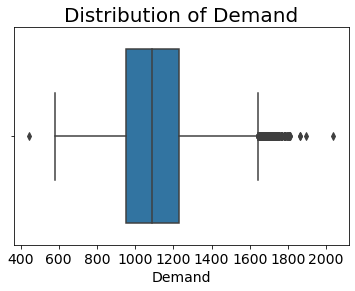

In [116]:
# box plot of the variable demand
ax = sns.boxplot(df.DEMAND)

# notation indicating an outlier
"""ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
"""
# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Demand', fontsize=14)
plt.title('Distribution of Demand', fontsize=20)

***Scatter plot to further visually identify the outliers***

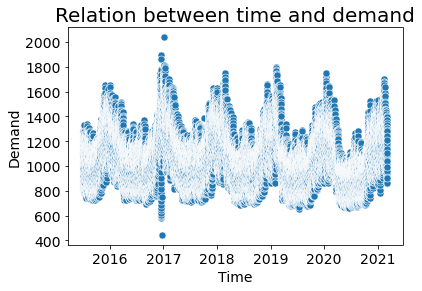

In [117]:

# scatter plot
ax = sns.scatterplot(x='DATE', y='DEMAND', data=df, s=50)

"""
# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
"""
# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.title('Relation between time and demand', fontsize=20);

**We can still see outliers or questionable records around the end of 2016 and early 2017 time. Must investigate further and handle properly.**

In [118]:
df[(np.abs(stats.zscore(df.DEMAND)) > 3)]

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
11944,2016-12-08 16:53:00,2016-12-08,37.0,0.00,41.0,BKN,29.93,10.00,South,13.0,1720.000000
11954,2016-12-09 02:30:00,2016-12-09,32.0,0.01,96.0,SCT,29.97,9.00,Calm,0.0,1713.000000
11969,2016-12-09 17:53:00,2016-12-09,35.0,0.00,93.0,OVC,29.85,10.00,East,11.0,1720.000000
11970,2016-12-09 18:53:00,2016-12-09,35.0,0.01,93.0,OVC,29.83,10.00,South,7.0,1729.000000
11971,2016-12-09 19:00:00,2016-12-09,36.0,0.00,89.0,OVC,29.82,10.00,South,7.0,1717.000000
11977,2016-12-10 01:53:00,2016-12-10,35.0,0.00,100.0,BKN,29.80,10.00,South,13.0,1715.000000
11978,2016-12-10 02:53:00,2016-12-10,35.0,0.00,100.0,BKN,29.81,10.00,East,10.0,1750.000000
12136,2016-12-16 16:53:00,2016-12-16,32.0,0.00,52.0,CLR,30.19,10.00,Calm,0.0,1785.000000
12137,2016-12-16 17:53:00,2016-12-16,31.0,0.00,52.0,CLR,30.22,10.00,North,3.0,1763.000000
12138,2016-12-16 18:53:00,2016-12-16,31.0,0.00,49.0,CLR,30.23,10.00,Calm,0.0,1863.583731


In [112]:
df.DEMAND.loc[(df.DEMAND < 676) & (df.Temperature < 60)] = np.NaN

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [113]:
df.DEMAND.interpolate(method='spline', order=2, inplace=True)

In [136]:
df.DEMAND.iloc[12079:12109] = df.DEMAND.loc[(df.DATE >= '2017-12-14 07:53:00') & (df.DATE <= '2017-12-15 12:53:00')]

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [139]:
df.DEMAND.loc[(df.DEMAND < 676) & (df.Temperature < 60)]

12228    444.807960
40666    668.906333
Name: DEMAND, dtype: float64

In [146]:
df.DEMAND.iloc[12228] = 1150.0

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [147]:
df.DEMAND.iloc[12229] = 1200.0

In [134]:
df.DEMAND.loc[(df.DATE >= '2017-12-14 07:53:00') & (df.DATE <= '2017-12-15 12:53:00')]

20407    1216.0
20408    1110.0
20409    1035.0
20410    1004.0
20411     983.0
20412     995.0
20413    1050.0
20414    1172.0
20415    1366.0
20416    1492.0
20417    1472.0
20418    1431.0
20419    1387.0
20420    1349.0
20421    1325.0
20422    1298.0
20423    1282.0
20424    1302.0
20425    1385.0
20426    1446.0
20427    1428.0
20428    1405.0
20429    1379.0
20430    1313.0
20431    1221.0
20432     979.0
20433    1037.0
20434    1006.0
20435     979.0
20436    1001.0
Name: DEMAND, dtype: float64

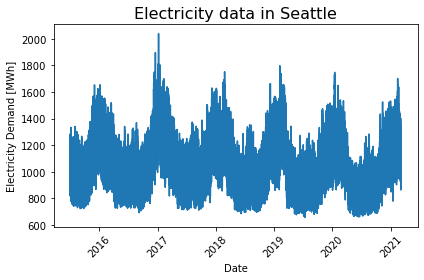

In [148]:
fig,ax = plt.subplots()
ax.plot(df['DATE'], df['DEMAND'])
ax.set_title('Electricity data in Seattle', fontsize=16)
ax.set_ylabel('Electricity Demand [MWh]')
ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.tight_layout()

In [150]:
df.DEMAND.loc[(df.DEMAND < 600) | (df.DEMAND > 1800)]

12138    1863.583731
12139    1896.002378
12140    1862.788168
12508    1808.000000
12521    1812.000000
12531    1805.000000
12544    2038.404159
12545    1812.000000
12712    1806.000000
Name: DEMAND, dtype: float64

In [154]:
df.DEMAND.iloc[12544] = 1751.0

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


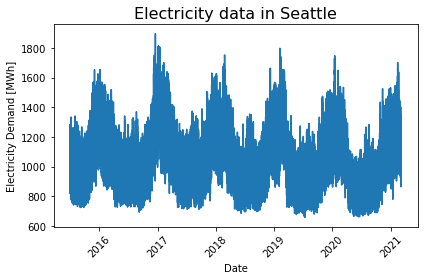

In [155]:
fig,ax = plt.subplots()
ax.plot(df['DATE'], df['DEMAND'])
ax.set_title('Electricity data in Seattle', fontsize=16)
ax.set_ylabel('Electricity Demand [MWh]')
ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.tight_layout()

Now we finally have what we want to work with

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


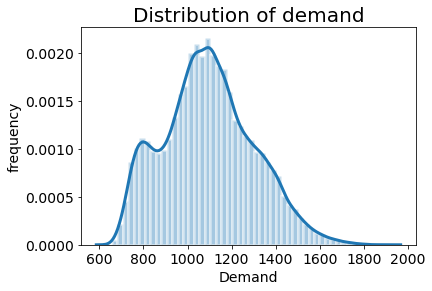

In [156]:
# histogram and kernel density estimation function of the variable Demand
ax = sns.distplot(df.DEMAND, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
"""ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))"""

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Demand', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of demand', fontsize=20);

***BoxPlot to statistically identify outliers***

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Demand')

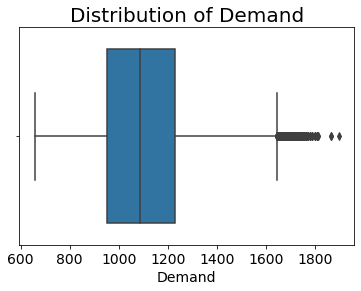

In [157]:
# box plot of the variable demand
ax = sns.boxplot(df.DEMAND)

# notation indicating an outlier
"""ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
"""
# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Demand', fontsize=14)
plt.title('Distribution of Demand', fontsize=20)

***Scatter plot to further visually identify the outliers***

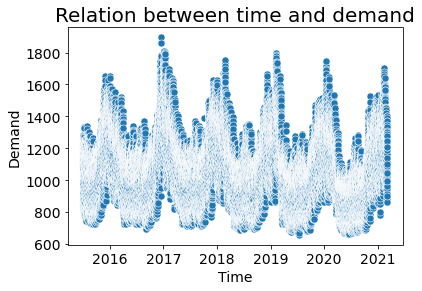

In [158]:

# scatter plot
ax = sns.scatterplot(x='DATE', y='DEMAND', data=df, s=50)

"""
# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
"""
# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Demand', fontsize=14)
plt.title('Relation between time and demand', fontsize=20);

**Now we have a spread that makes sense.**

In [161]:
df[df.DEMAND <= 0], df.isna().sum()

(Empty DataFrame
 Columns: [DATE, SHORTDATE, Temperature, Precipitation, Humidity, Condition, Pressure, Visibility, WindDirection, WindSpeed, DEMAND]
 Index: [],
 DATE             0
 SHORTDATE        0
 Temperature      0
 Precipitation    0
 Humidity         0
 Condition        0
 Pressure         0
 Visibility       0
 WindDirection    0
 WindSpeed        0
 DEMAND           0
 dtype: int64)

In [162]:
with open('seattle_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)